In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
#Loading the dataset
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
na_cols = []
for col in df.columns:
    if df[col].isna().sum() !=0:
        na_cols.append(col)

print(na_cols)


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

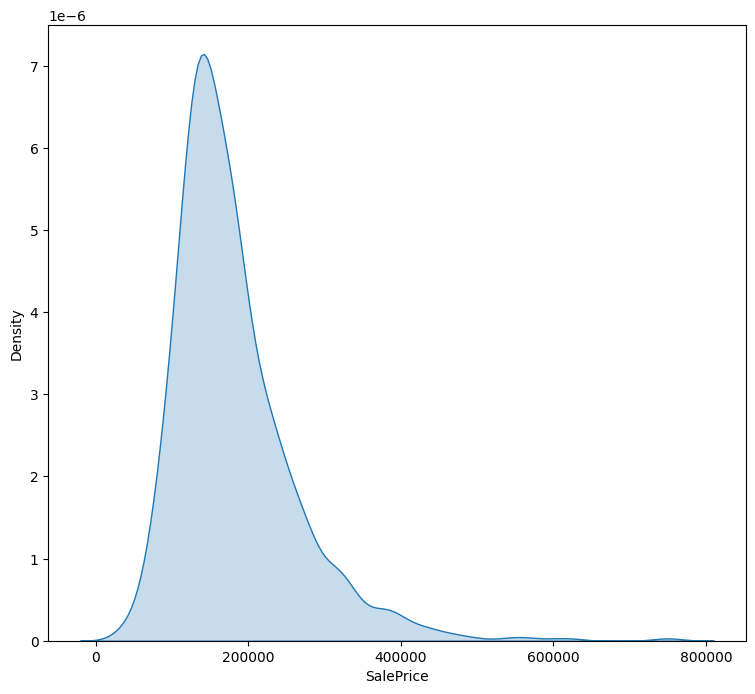

In [ ]:
plt.figure(figsize=(9, 8))
sns.kdeplot(df['SalePrice'], fill=True);

In [ ]:
#Handling Missing Value
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
 'PoolQC', 'Fence', 'MiscFeature']

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
#How much % data is missing:
missing_percent = []
for col in na_cols:
    value = round(df[col].isna().sum() / len(df)*100,2)
    print(value)
    missing_percent.append(value)



17.74
93.77
0.55
0.55
2.53
2.53
2.6
2.53
2.6
0.07
47.26
5.55
5.55
5.55
5.55
5.55
99.52
80.75
96.3


In [ ]:
percentile_list = pd.DataFrame({'Missing_col_name' : na_cols,
                                'Missing_col_' : missing_percent},
                                columns=['Missing_col_name','Missing_col_'])
percentile_list

,Missing_col_name,Missing_col_
0,LotFrontage,17.74
1,Alley,93.77
2,MasVnrType,0.55
3,MasVnrArea,0.55
4,BsmtQual,2.53
5,BsmtCond,2.53
6,BsmtExposure,2.60
7,BsmtFinType1,2.53
8,BsmtFinType2,2.60
9,Electrical,0.07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
drops_cols = ['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType']
df.drop(drops_cols, axis=1,inplace=True)
df_test.drop(drops_cols, axis=1,inplace=True)

In [ ]:
na_cols2 = [col for col in na_cols if col not in drops_cols]
na_cols2

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
df.loc[:,na_cols2].head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   5 non-null      float64
 1   MasVnrArea    5 non-null      float64
 2   BsmtQual      5 non-null      object 
 3   BsmtCond      5 non-null      object 
 4   BsmtExposure  5 non-null      object 
 5   BsmtFinType1  5 non-null      object 
 6   BsmtFinType2  5 non-null      object 
 7   Electrical    5 non-null      object 
 8   GarageType    5 non-null      object 
 9   GarageYrBlt   5 non-null      float64
 10  GarageFinish  5 non-null      object 
 11  GarageQual    5 non-null      object 
 12  GarageCond    5 non-null      object 
dtypes: float64(3), object(10)
memory usage: 648.0+ bytes


In [ ]:
df['BsmtQual'].dtypes == 'object'

True

In [ ]:
for col in na_cols2:
    if df[col].dtypes == 'object':
        obj_val = df[col].mode().iloc[0]  # Access the mode value
        df[col].fillna(obj_val, inplace=True)
    elif df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        num_val = df[col].mean()
        df[col].fillna(num_val, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
df_test.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 73, dtype: int64

In [ ]:
na_cols3 = []
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
        na_cols3.append(col)

print(na_cols3)


['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [ ]:
for col in na_cols3:
    if df_test[col].dtypes == 'object':
        obj_val = df_test[col].mode().iloc[0]  # Access the mode value
        df_test[col].fillna(obj_val, inplace=True)
    elif df_test[col].dtypes == 'float64' or df_test[col].dtypes == 'int64':
        num_val = df_test[col].mean()
        df_test[col].fillna(num_val, inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
# !pip install pycaret &> /dev/null
# print ("Pycaret installed sucessfully!!")
# pip install scipy
# from pycaret.regression import *

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
# reg_setup = setup(data=df, target='SalePrice', categorical_features=categorical_columns,
# #                  numeric_imputation='mean', categorical_imputation='mode',
#                  normalize=True, normalize_method='zscore',verbose=False)
# best_model = compare_models(sort='RMSE')

In [ ]:
# tuned_model = tune_model(best_model)
# evaluate_model(tuned_model)
# predictions = predict_model(tuned_model, data=test_new)
# sample=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
#sample['SalePrice']=predictions['prediction_label']
# sample.to_csv('Sub.csv',index=False)

In [ ]:
#Using Catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)

# Separate features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Handle categorical features using Label Encoding
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object'])
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)
X.drop(X_categorical.columns, axis=1, inplace=True)
X = pd.concat([X, X_categorical_encoded], axis=1)

# Convert feature names to a list of strings
feature_names = list(X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Pool
train_pool = Pool(X_train, label=y_train, cat_features=list(X_categorical_encoded.columns))

# Define the CatBoostRegressor model
catboost_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE')

# Fit the model on the training data
catboost_model.fit(train_pool)

# Make predictions on the test set
test_pool = Pool(X_test, cat_features=list(X_categorical_encoded.columns))
y_pred = catboost_model.predict(test_pool)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


0:	learn: 72724.9912970	total: 146ms	remaining: 2m 26s
1:	learn: 68329.5279700	total: 217ms	remaining: 1m 48s
2:	learn: 64499.2562497	total: 310ms	remaining: 1m 42s
3:	learn: 60944.5259713	total: 458ms	remaining: 1m 54s
4:	learn: 57647.2374295	total: 569ms	remaining: 1m 53s
5:	learn: 54605.0151707	total: 684ms	remaining: 1m 53s
6:	learn: 51842.5441220	total: 796ms	remaining: 1m 52s
7:	learn: 49928.3527913	total: 945ms	remaining: 1m 57s
8:	learn: 47702.0353992	total: 1.03s	remaining: 1m 53s
9:	learn: 45472.1260753	total: 1.13s	remaining: 1m 52s
10:	learn: 43629.7058876	total: 1.22s	remaining: 1m 50s
11:	learn: 41924.6824000	total: 1.32s	remaining: 1m 49s
12:	learn: 40420.0843899	total: 1.46s	remaining: 1m 51s
13:	learn: 38912.2967795	total: 1.58s	remaining: 1m 51s
14:	learn: 37707.0325595	total: 1.63s	remaining: 1m 46s
15:	learn: 36556.5802139	total: 1.75s	remaining: 1m 47s
16:	learn: 35471.5157793	total: 1.82s	remaining: 1m 45s
17:	learn: 34331.7939849	total: 1.96s	remaining: 1m 47s
18

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'iterations': [100, 200, 500],  # Number of boosting iterations
#     'depth': [6, 8, 10],  # Depth of the trees
#     'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage used in updates
#     'l2_leaf_reg': [3, 5, 7],  # L2 regularization term on weights
#     'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
#     'colsample_bylevel': [0.8, 1.0],  # Subsample ratio of columns for each level
#     #'cat_features': [categorical_feature_indices]  # Specify categorical features indices
# }

# # Create CatBoostRegressor
# catboost_model = CatBoostRegressor(loss_function='RMSE')

# # Perform GridSearchCV
# grid_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1,verbose=0)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and corresponding mean cross-validated score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)


In [ ]:
#Best Parameters:  {'subsample': 0.8, 'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 6, 'colsample_bylevel': 0.8}
#Best Score:  -671680163.804813
#Using the best model ie CatBoost:
#It also uses an algorithm called symmetric weighted quantile sketch(SWQS) which automatically
#handles the missing values in the dataset to reduce overfitting and improve the overall performance of the dataset.


import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)

# Separate features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Handle categorical features using Label Encoding
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object'])
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)
X.drop(X_categorical.columns, axis=1, inplace=True)
X = pd.concat([X, X_categorical_encoded], axis=1)

# Convert feature names to a list of strings
feature_names = list(X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Pool
train_pool = Pool(X_train, label=y_train, cat_features=list(X_categorical_encoded.columns))

# Define the CatBoostRegressor model
catboost_model = CatBoostRegressor(iterations=500,
                                   depth=6,
                                   loss_function='RMSE',
                                   subsample = 0.8,
                                   learning_rate = 0.05,
                                   l2_leaf_reg=  3,
                                   colsample_bylevel=  0.8
                                  )

# Fit the model on the training data
catboost_model.fit(train_pool)

# Make predictions on the test set
test_pool = Pool(X_test, cat_features=list(X_categorical_encoded.columns))

0:	learn: 74782.6369913	total: 21.9ms	remaining: 10.9s
1:	learn: 72446.0114083	total: 48.2ms	remaining: 12s
2:	learn: 70359.2562205	total: 70.3ms	remaining: 11.6s
3:	learn: 68157.2057869	total: 98.1ms	remaining: 12.2s
4:	learn: 66124.4867422	total: 119ms	remaining: 11.8s
5:	learn: 64143.5280190	total: 151ms	remaining: 12.4s
6:	learn: 62473.7853969	total: 173ms	remaining: 12.2s
7:	learn: 60749.4049228	total: 196ms	remaining: 12s
8:	learn: 59282.8767157	total: 216ms	remaining: 11.8s
9:	learn: 57760.9285458	total: 238ms	remaining: 11.7s
10:	learn: 56350.1483936	total: 255ms	remaining: 11.3s
11:	learn: 55063.6044851	total: 273ms	remaining: 11.1s
12:	learn: 53618.3674682	total: 306ms	remaining: 11.4s
13:	learn: 52243.4829259	total: 328ms	remaining: 11.4s
14:	learn: 51061.9086857	total: 357ms	remaining: 11.5s
15:	learn: 50029.7922197	total: 374ms	remaining: 11.3s
16:	learn: 48989.3607418	total: 395ms	remaining: 11.2s
17:	learn: 47950.5332260	total: 420ms	remaining: 11.2s
18:	learn: 46877.103

In [ ]:
y_pred = catboost_model.predict(test_pool)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 653059870.8770158


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9148589182210926

In [ ]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
test_df = df_test[:]

In [ ]:
test_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import LabelEncoder

# Load your test dataset (replace 'your_test_dataset.csv' with your actual test dataset)

# Separate features from the test dataset
X_test = test_df.copy()


# Handle missing values in categorical features
categorical_columns = X_test.select_dtypes(include=['object']).columns
X_test[categorical_columns] = X_test[categorical_columns] #.fillna('Missing')  # Replace NaN with a placeholder string

# Create a CatBoost Pool for the test set
test_pool = Pool(X_test, cat_features=list(categorical_columns))

# Make predictions on the test set
test_predictions = catboost_model.predict(test_pool)

# Display the predictions for the test set
print("Test Predictions:")
print(test_predictions)

Test Predictions:
[135612.35083776 163483.21727909 181392.65196411 ... 185919.5318889
 126534.69259239 222784.68441704]


In [ ]:
test_df = pd.read_csv('test.csv')
ids = test_df['Id'].tolist()

In [ ]:
output = pd.DataFrame({'Id': ids, 'SalePrice': test_predictions})
output.head()

,Id,SalePrice
0,1461,135612.350838
1,1462,163483.217279
2,1463,181392.651964
3,1464,182503.300840
4,1465,188982.977489


In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = test_predictions
sample_submission_df.reset_index(drop=True, inplace=True)
sample_submission_df.to_csv('submission.csv',index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,135612.350838
1,1462,163483.217279
2,1463,181392.651964
3,1464,182503.300840
4,1465,188982.977489


In [ ]:
#Neural Network

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Separate features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Handle categorical features using Label Encoding
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object'])
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)
X.drop(X_categorical.columns, axis=1, inplace=True)
X = pd.concat([X, X_categorical_encoded], axis=1)



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often beneficial for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression task

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mean_squared_error',metrics=["mae"])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {r2_score}')


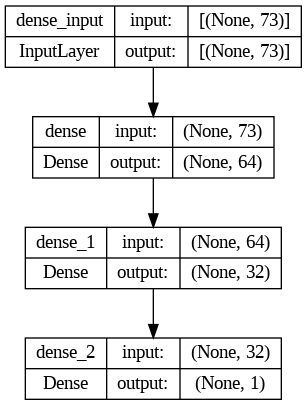

In [ ]:
from tensorflow.keras.utils import plot_model # model.summary can be more visuallt better like below eg

plot_model(model, show_shapes=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Separate features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Handle categorical features using Label Encoding
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer='l1'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu')) #64
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer='l1')) #32
model.add(BatchNormalization())
model.add(Dense(16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

# Compile the model with Adam optimizer, Mean Squared Error loss, and R2 score metric
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error', metrics=["mae", keras.metrics.RootMeanSquaredError(), keras.metrics.MeanSquaredLogarithmicError(), keras.metrics.MeanAbsolutePercentageError()])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using R2 Score
r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')


Epoch 1/200
30/30 [==============================] - 6s 34ms/step - loss: 39147212800.0000 - mae: 181527.2188 - root_mean_squared_error: 197856.5469 - mean_squared_logarithmic_error: 144.5257 - mean_absolute_percentage_error: 100.0005 - val_loss: 37842190336.0000 - val_mae: 181102.2188 - val_root_mean_squared_error: 194530.6875 - val_mean_squared_logarithmic_error: 144.0871 - val_mean_absolute_percentage_error: 100.0000
Epoch 2/200
30/30 [==============================] - 0s 12ms/step - loss: 39146962944.0000 - mae: 181526.5469 - root_mean_squared_error: 197855.9219 - mean_squared_logarithmic_error: 141.9345 - mean_absolute_percentage_error: 100.0001 - val_loss: 37842141184.0000 - val_mae: 181102.0625 - val_root_mean_squared_error: 194530.5625 - val_mean_squared_logarithmic_error: 141.5790 - val_mean_absolute_percentage_error: 99.9999
Epoch 3/200
30/30 [==============================] - 0s 9ms/step - loss: 39146749952.0000 - mae: 181526.0156 - root_mean_squared_error: 197855.3750 - mea

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               9472      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_2 (Bat  (None, 64)               

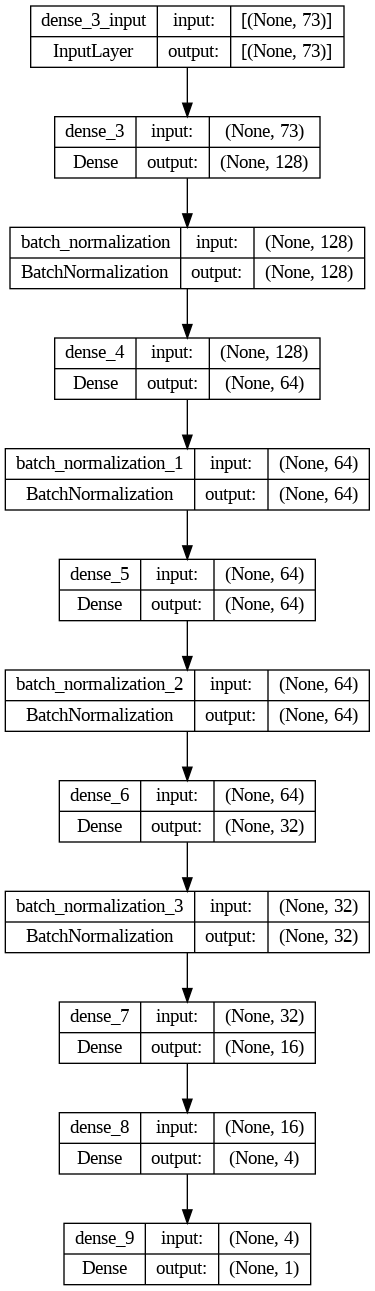

In [ ]:
from tensorflow.keras.utils import plot_model # model.summary can be more visuallt better like below eg

plot_model(model, show_shapes=True)

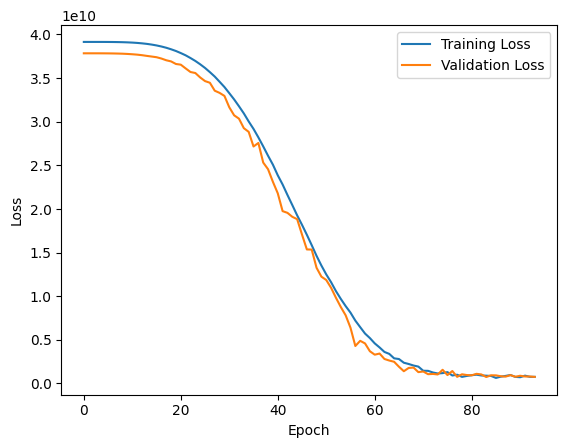

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_df = df_test[:]

In [ ]:
categorical_columns_test = test_df.select_dtypes(include=['object']).columns
label_encoder_test = LabelEncoder()

for col in categorical_columns_test:
    test_df[col] = label_encoder_test.fit_transform(test_df[col])

# Standardize the test data
X_test_scaled = scaler.transform(test_df)  # Assuming 'scaler' is the scaler fitted on the training data

# Make predictions on the test set
y_pred_test = model.predict(X_test_scaled)

# Assuming you want to create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Predicted_SalePrice': y_pred_test.flatten()})

# Display or save the predictions
print(predictions_df)

# Note: Ensure that the features in 'test_df' match the features used during training.


46/46 [==============================] - 0s 7ms/step
      Predicted_SalePrice
0           125616.859375
1           204629.890625
2           180841.078125
3           184503.359375
4           163728.078125
...                   ...
1454          8751.187500
1455         28192.613281
1456        158137.546875
1457        123546.835938
1458        216466.718750

[1459 rows x 1 columns]


In [ ]:
predictions_df

,Predicted_SalePrice
0,125616.859375
1,204629.890625
2,180841.078125
3,184503.359375
4,163728.078125
...,...
1454,8751.187500
1455,28192.613281
1456,158137.546875
1457,123546.835938


In [ ]:
feature_series = predictions_df.iloc[:, 0]

In [ ]:
feature_series

0       125616.859375
1       204629.890625
2       180841.078125
3       184503.359375
4       163728.078125
            ...      
1454      8751.187500
1455     28192.613281
1456    158137.546875
1457    123546.835938
1458    216466.718750
Name: Predicted_SalePrice, Length: 1459, dtype: float32

In [ ]:
sub = pd.read_csv('sample_submission.csv')
ids = sub['Id'].tolist()
ids

In [ ]:
output2 = pd.DataFrame({'Id': ids, 'SalePrice': feature_series})
output2.to_csv('submission_deeplearning.csv')

In [ ]:
sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = test_predictions
sample_submission_df.reset_index(drop=True, inplace=True)
sample_submission_df.to_csv('submission.csv',index=False)
sample_submission_df.head()

In [ ]:
dataset_df = df.drop('Id', axis=1)
dataset_df.head(3)

KeyError: "['Id'] not found in axis"

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 101.2 MB/s eta 0:00:00


In [ ]:
#NEW

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [ ]:
dataset_df = pd.read_csv('train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [ ]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-8-dc911a47893e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


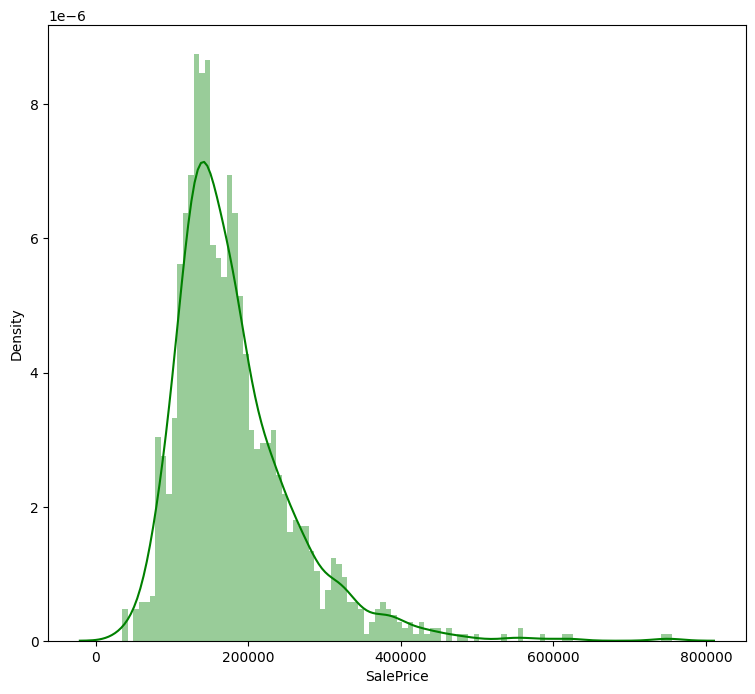

In [ ]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1004 examples in training, 456 examples in testing.


In [ ]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp3c3pchm_ as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:09.070864. Found 1004 examples.
Training model...
Model trained in 0:00:04.535735
Compiling model...
Model compiled.


In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

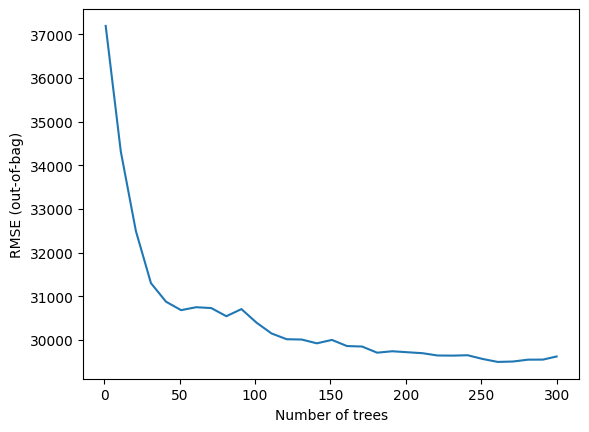

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1004, accuracy=None, loss=None, rmse=29625.636129525847, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 810748544.0000
loss: 0.0000
mse: 810748544.0000


In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 132.0),
 ("Neighborhood" (4; #59), 45.0),
 ("ExterQual" (4; #22), 41.0),
 ("GarageCars" (1; #32), 30.0),
 ("GrLivArea" (1; #38), 20.0),
 ("BsmtQual" (4; #14), 10.0),
 ("KitchenQual" (4; #44), 8.0),
 ("GarageArea" (1; #31), 5.0),
 ("TotalBsmtSF" (1; #73), 4.0),
 ("YearBuilt" (1; #76), 3.0),
 ("Foundation" (4; #28), 1.0),
 ("FullBath" (1; #29), 1.0)]

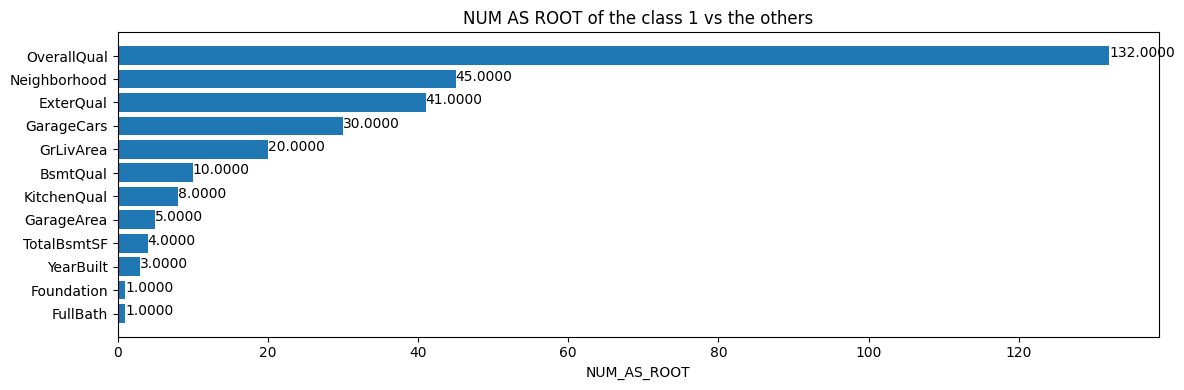

In [ ]:

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [ ]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 17ms/step


,Id,SalePrice
0,1461,125658.898438
1,1462,156491.375000
2,1463,180221.781250
3,1464,182107.656250
4,1465,195911.796875


In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission33.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 24ms/step


,Id,SalePrice
0,1461,125658.898438
1,1462,156491.375000
2,1463,180221.781250
3,1464,182107.656250
4,1465,195911.796875


In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
feature_array = sample_submission_df['SalePrice'].values
feature_array

array([169277.0524984 , 187758.39398877, 183583.68356955, ...,
       219222.42340006, 184924.279659  , 187741.86665748])

In [ ]:
from sklearn.metrics import r2_score

r2_score(preds, feature_array)

0.08109570638809138